### Load Libraries

In [19]:
library(tidyverse)
library(cowplot)
library(scales)
library(tidymodels)

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/



### Read Data into R

Using the read_csv function, we will read the Tennis Data into R via a relative path. The output of this function will be assigned the name "tennis_data"

In [3]:
tennis_data <- read_csv("atp2017-2019.csv")
tennis_data

New names:
• `` -> `...1`
Rows: 6866 Columns: 50
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (16): tourney_id, tourney_name, surface, tourney_level, winner_seed, win...
dbl (34): ...1, draw_size, tourney_date, match_num, winner_id, winner_ht, wi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,⋯,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,2019-M020,Brisbane,Hard,32,A,20181231,300,105453,2,⋯,54,34,20,14,10,15,9,3590,16,1977
1,2019-M020,Brisbane,Hard,32,A,20181231,299,106421,4,⋯,52,36,7,10,10,13,16,1977,239,200
2,2019-M020,Brisbane,Hard,32,A,20181231,298,105453,2,⋯,27,15,6,8,1,5,9,3590,40,1050
3,2019-M020,Brisbane,Hard,32,A,20181231,297,104542,NA,⋯,60,38,9,11,4,6,239,200,31,1298
4,2019-M020,Brisbane,Hard,32,A,20181231,296,106421,4,⋯,56,46,19,15,2,4,16,1977,18,1855
5,2019-M020,Brisbane,Hard,32,A,20181231,295,104871,NA,⋯,54,40,18,15,6,9,40,1050,185,275
6,2019-M020,Brisbane,Hard,32,A,20181231,294,105453,2,⋯,53,37,13,12,6,9,9,3590,19,1835
7,2019-M020,Brisbane,Hard,32,A,20181231,293,104542,NA,⋯,51,34,11,11,6,11,239,200,77,691
8,2019-M020,Brisbane,Hard,32,A,20181231,292,200282,7,⋯,39,30,3,9,3,6,31,1298,72,715


### Extract our variables 

Using the select function we will extract the following columns: winner_ht, w_ace, w_svpt, w_SvGms. These columns will give us useful imformation regarding the service data, such as the number of aces, service points, and service games. It is also important to remember to select the height column as that is ultimately the variable we wish to predict. Next, we will filter each column using !is.na to remove any uneeded N/A values that may appear in our data. The output of select and filter will be assigned the name "useful_col"

In [43]:
useful_col <- select(tennis_data, winner_ht, w_ace, w_svpt, w_SvGms)|>
filter(!is.na(winner_ht))|>
filter(!is.na(w_ace))|>
filter(!is.na(w_svpt))|>
filter(!is.na(w_SvGms))
useful_col

winner_ht,w_ace,w_svpt,w_SvGms
<dbl>,<dbl>,<dbl>,<dbl>
178,3,77,13
178,2,47,8
188,12,68,11
188,10,94,16
178,5,59,12
188,11,64,10
196,21,62,11
188,17,84,15
188,6,63,10


In [44]:
tennis <- useful_col |>
  mutate(winner_ht = as_factor(winner_ht)) 


In [45]:
tennis

winner_ht,w_ace,w_svpt,w_SvGms
<fct>,<dbl>,<dbl>,<dbl>
178,3,77,13
178,2,47,8
188,12,68,11
188,10,94,16
178,5,59,12
188,11,64,10
196,21,62,11
188,17,84,15
188,6,63,10


In [51]:
tennis_split <- initial_split(tennis, prop = 0.75, strata = winner_ht)
tennis_train <- training(tennis_split)
tennis_test <- testing(tennis_split) 
tennis_train
tennis_test

tennis_recipe <- recipe(winner_ht ~ w_ace+w_svpt+w_SvGms, data = tennis_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(tennis_recipe) |>
  add_model(knn_spec) |>
  fit(data = tennis_train)


winner_ht,w_ace,w_svpt,w_SvGms
<fct>,<dbl>,<dbl>,<dbl>
196,21,62,11
193,44,119,18
183,8,98,15
183,7,88,15
183,2,49,9
183,3,51,9
196,11,53,9
208,17,51,11
190,8,63,10


winner_ht,w_ace,w_svpt,w_SvGms
<fct>,<dbl>,<dbl>,<dbl>
178,5,59,12
188,17,84,15
178,7,56,10
188,11,76,11
196,18,38,8
188,9,76,10
180,8,117,17
188,5,75,14
188,3,42,8


In [50]:
summarize(tennis,
          mean_w_ace = mean(w_ace),
          mean_w_svpt = mean(w_svpt),
          mean_w_SvGms = mean (w_SvGms))

mean_w_ace,mean_w_svpt,mean_w_SvGms
<dbl>,<dbl>,<dbl>
7.574459,79.75606,12.91407


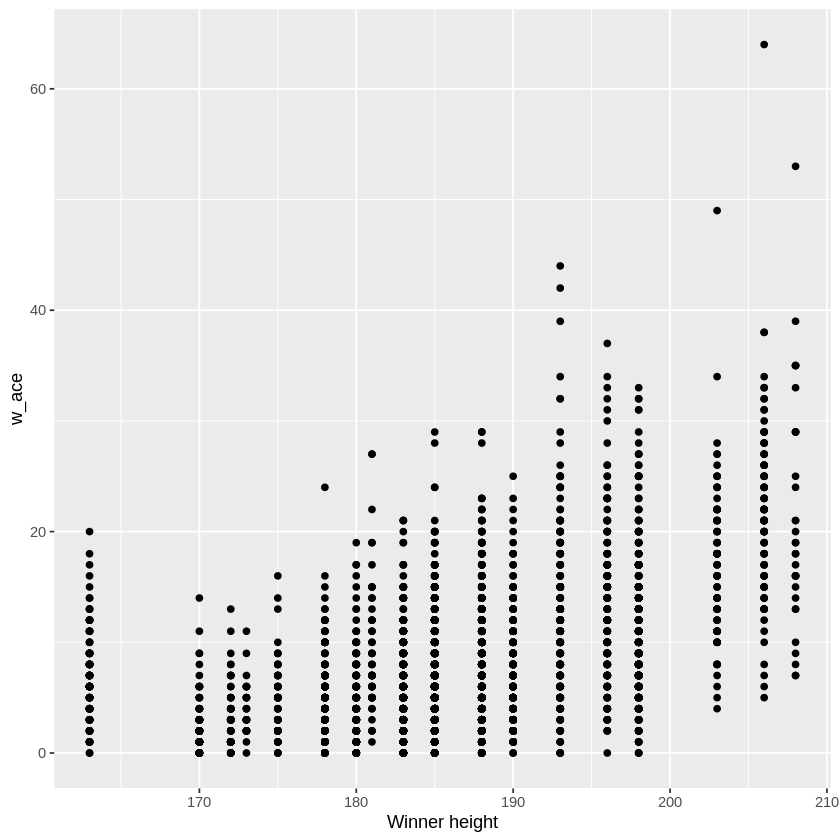

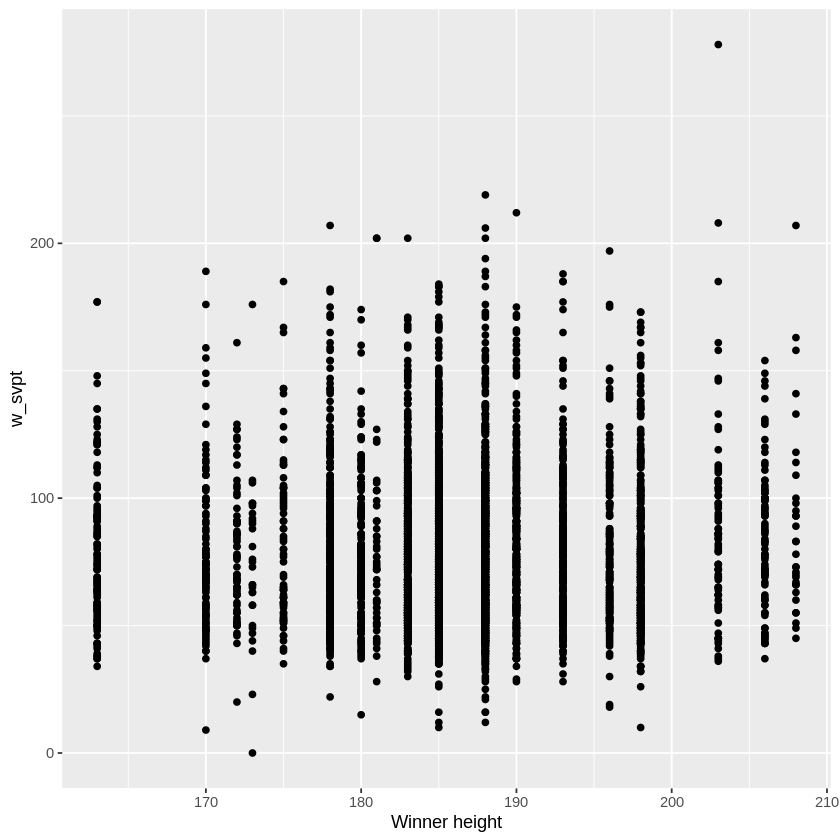

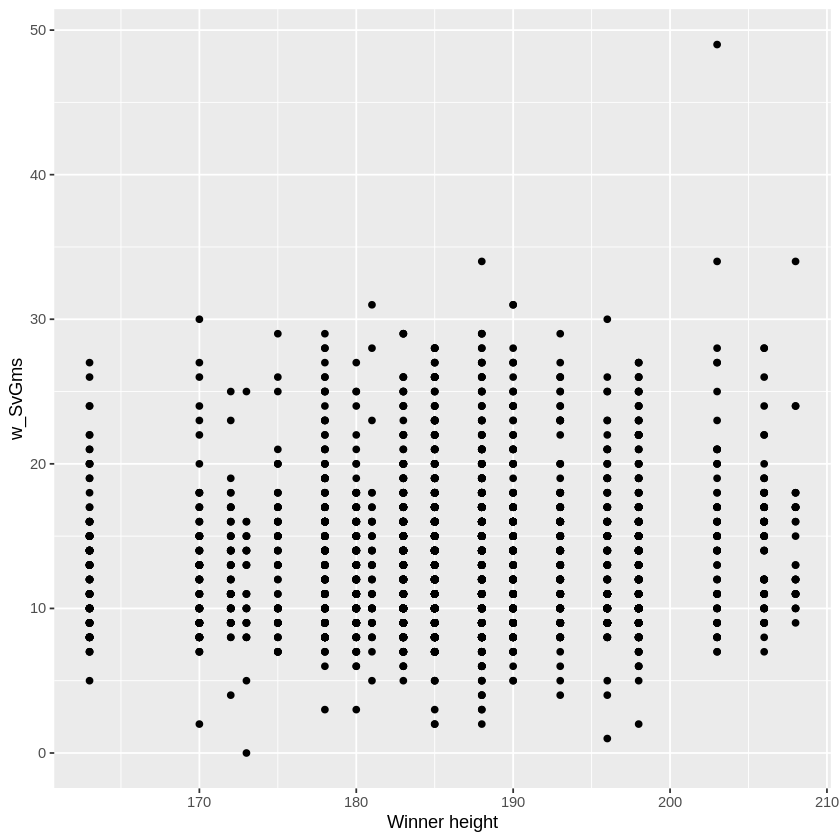

In [68]:
plot_1 <- ggplot(useful_col, aes(x = winner_ht, y = w_ace)) +
 geom_point()+
xlab("Winner height")
plot_1

plot_2 <- ggplot(useful_col, aes(x = winner_ht, y = w_svpt)) +
 geom_point()+
xlab("Winner height")
plot_2

plot_3 <- ggplot(useful_col, aes(x = winner_ht, y = w_SvGms)) +
 geom_point()+
xlab("Winner height")
plot_3